# Model Evaluation and Grid Search for Pima data.


### Tasks involved in this analysis.

- Divding the data into train and test data.
- Analysing the data by implementing pipeline to evaluate the model.
- Involving the StandardScalar and Logestic Regression.
- Checking with the confusion matrics under which this data falls (Accuracy, Precision,etc...).
- Running a Logistic Regression model with grid search cross-validation using 10 folds. 
- Searching 5 different regularization strengths and 2 solvers.  
- Checking which is best model and how it perform on the test set? 

In [1]:
# importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("pima_indian_data.csv")

In [2]:
# to get the top 5 columns.
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# to retrive the number of rows and columns.
df.shape

(768, 9)

In [4]:
# basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Data is clean without any null values.
- Data types also suited with column values.

In [5]:
# checking for null values.
df.isnull().sum()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

- No values to impute.

In [6]:
# retreiving maths behind the dataset to find relations.
df.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


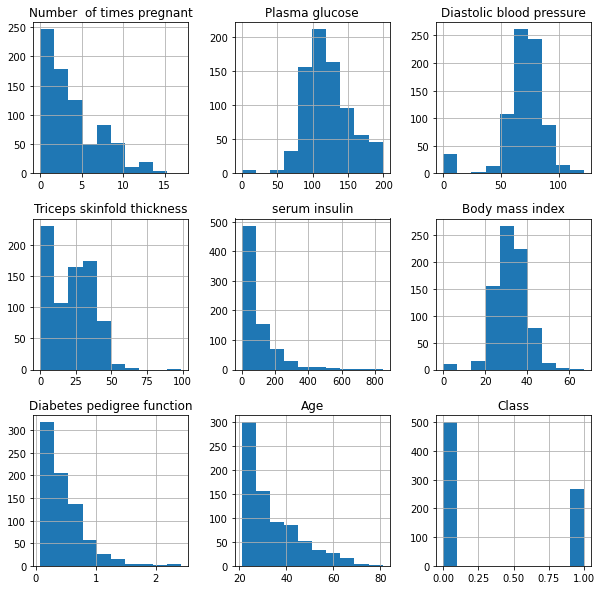

In [7]:
# visualising the coloumns to find patterns.
df.hist(figsize=(10,10))
plt.show()

- By looking the above graphs we can be noticed that *Plasma glucose*, *Diastolic blood pressure* and *Body mass index* were distributed normally.
- Rest of all the distributions were skewd left side.

<AxesSubplot:>

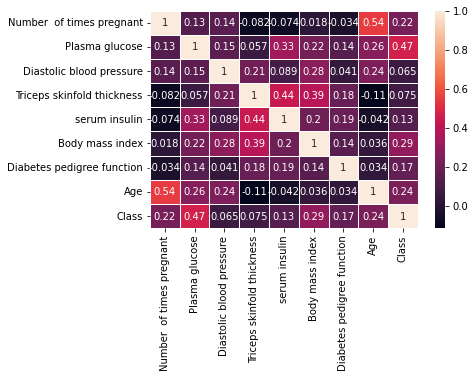

In [8]:
# checking for correlation between variables.
sns.heatmap(df.corr(),linewidths=0.5,annot=True)

- From the above graph I observed that, there is hard to find correlation between variables.  

In [9]:
# Count of two labels.
df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

- It looks like balanced dataset.
- This data falls under the metrics like Accuracy, Recall, ROC and AUC.

## Splitting data to train, test

In [10]:
# importing the sklearn libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [11]:
# splitting the data into train and test.
X = df[['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age']]
y = df['Class']


#### Another way to split the data
df1 = df.values  
X=df1[:,0:8]  
y=df1[:,8]  

In [12]:
# Splitting data into train and test.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

- By incresing the random_state value the accuracy of model is getting decrease.
- If we assign some random state value always it takes the same data for assigned value.
- If we completly remove random state the data splits on its own permutations the accuracy always changes for every execution.

In [13]:
# checking for the shape of train and test.
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")
print(f"No. of training examples: {y_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 576
No. of testing examples: 192
No. of training examples: 576
No. of testing examples: 192


## Pipeline implementation with logestic regression

In [14]:
# creating pipeline for the pima dataset.
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression())])

#('pca1',PCA(n_components=4)),

In [15]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scalar1', StandardScaler()),
                ('lr_classifier', LogisticRegression())])

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

y_test_pred = pipeline_lr.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

[[118  12]
 [ 26  36]]


In [17]:
accuracy = accuracy_score(y_test, y_test_pred )
accuracy

0.8020833333333334

In [18]:
recall = recall_score(y_test, y_test_pred )
recall

0.5806451612903226

In [19]:
#printing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



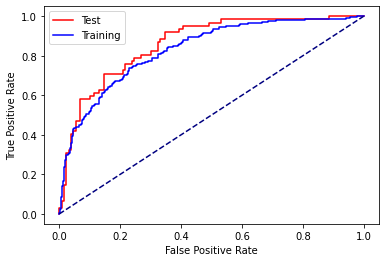

In [20]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=pipeline_lr):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.8595533498759305

## After applying grid search cross validation

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
parameters = [{'lr_classifier__solver': ['liblinear', 'saga', 'sag'],
               'lr_classifier__C':[0.5,1.0,1.5,2,5],
               'lr_classifier__class_weight':[None,'balanced'],
               'lr_classifier__penalty':['l2']}]

gcv_results = GridSearchCV(estimator = pipeline_lr , param_grid=parameters, cv=10, verbose=2, scoring = 'recall', return_train_score=False)

gcv_results = gcv_results.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=0.5, lr_classifier__class_weight=None, lr_class

[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=1.0, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[C

[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=liblinear; total time=   0.0s
[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=1.5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_

[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=2, lr_classifie

[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=saga; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=sag; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=sag; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__class_weight=None, lr_classifier__penalty=l2, lr_classifier__solver=sag; total time=   0.0s
[CV] END lr_classifier__C=5, lr_classifier__

##### Solvers:
- For small datasets, **liblinear** is a good choice, whereas **sag** and **saga** are faster for large ones.  

##### Regularization strengths:

- I have choosen these values [0.5,1.0,1.5,10,20].
- The reason behind choosing these values because smaller values specify stronger regularization.

In [29]:
gcv_results.best_score_

0.7080952380952381

In [30]:
# confusion metrics after appying gcv
from sklearn.metrics import confusion_matrix
y_test_pred = gcv_results.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

[[103  27]
 [ 15  47]]


In [31]:
# printing classifiaction report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       130
           1       0.64      0.76      0.69        62

    accuracy                           0.78       192
   macro avg       0.75      0.78      0.76       192
weighted avg       0.80      0.78      0.79       192



In [32]:
accuracy_score(y_test, y_test_pred )

0.78125

In [33]:
recall_score(y_test, y_test_pred)

0.7580645161290323

### Why it falls under Recall Metrics?
- A person having diabetis(Class-1) and the model classifying his case as No-diabetis(Class-0) comes under False Negatives.

# Summary
- Using sklearn I have splitted the data into train and test.
- Implemented the pipeline using Scalar and Logestic regression.
- I have eliminated PCA because it is a small data set. I have tried by applying PCA the accuracy got decresed.
- Values obtained, Accuracy = 0.80, Recall = 0.58 and ROC = 0.85
- Here ROC metrics value is 0.85 so this model falls under good category.
- After applying the grid search cross validation with solvers and regularizations the recall has incresed to 0.75 before it was 0.58.
